In [71]:
# import dependencies

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# read in CSV data using Pandas to make a dataframe
file = "crypto_data.csv"
df = pd.read_csv(file)

In [3]:
#preview the data
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
# drop all cryptocurrencies not currently being traded
trading = df.drop(df[df['IsTrading'] == False].index)
trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
# now that only currently trading currencies are left, drop the IsTrading column

current = trading.drop(['IsTrading'], axis=1)
current

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# drop all rows with null values

no_nulls =  current.dropna()
no_nulls

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [15]:
no_nulls.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [20]:
# drop all rows that have not been mined (TotalCoinsMined must be > 0)
mined = no_nulls.drop(no_nulls[no_nulls.TotalCoinsMined <= 0].index)
mined

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [21]:
# drop the CoinName column

nameless = mined.drop(['CoinName'], axis=1)
nameless

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [22]:
# drop the Unnamed: 0 column which contains text values not useful for unsupervised learning models

unnamed = nameless.drop(['Unnamed: 0'], axis=1)
unnamed

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [25]:
unnamed.dtypes

# TotalCoinSupply is an object (ie string) and needs to be converted to int or float

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [26]:
unnamed["TotalCoinSupply"] = pd.to_numeric(unnamed["TotalCoinSupply"])

In [27]:
unnamed.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [29]:
# convert Algorithm and ProofType columns from string to numeric data using Get Dummies
# Using Get Dummies causes the dataframe to jump from 4 columns to 98 columns

dums = pd.get_dummies(unnamed, prefix=['Algorithm', 'ProofType'])

dums

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# use Standard Scaler to standardize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(dums)
scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [44]:
scaled.shape

(532, 98)

In [42]:
# use PCA to reduce dimensionality
pca = PCA(n_components=0.9)
cc_pca = _pca = pca.fit_transform(scaled)
cc_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -3.14347031e-16, -9.12135823e-16,  2.51599752e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.40899850e-16, -6.63562740e-16,  1.76363717e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -4.28651623e-14,  1.52581172e-14,  2.33406076e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         6.43792050e-15,  5.39438665e-14,  4.08239752e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         6.40788354e-16,  1.39171221e-15, -1.63325938e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.55437290e-16, -2.85851680e-15,  1.49183539e-15]])

In [43]:
cc_pca.shape

(532, 74)

In [47]:
# return the data to a dataframe
pca_df = pd.DataFrame(cc_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,9.543357e-15,2.584461e-14,2.783272e-12,-0.007129,-1.319756,-0.051813,...,2.337319e-15,5.504297e-16,-9.521754e-15,-2.223528e-15,3.187960e-15,4.367153e-16,1.859567e-15,-3.143470e-16,-9.121358e-16,2.515998e-15
1,-0.318434,1.032331,-0.591126,0.001386,9.454226e-15,2.583214e-14,2.760785e-12,-0.007739,-1.322514,-0.056674,...,2.318559e-15,1.463161e-16,-8.740104e-15,-9.796321e-16,2.067953e-15,7.849041e-16,2.400291e-15,1.408998e-16,-6.635627e-16,1.763637e-15
2,2.305468,1.656383,-0.683617,0.004731,2.129524e-14,3.755646e-14,9.428182e-12,-0.054781,-1.542879,-0.943951,...,-4.996160e-14,-3.979802e-14,5.785993e-14,6.190230e-14,-1.359053e-14,2.676015e-14,-6.589743e-14,-4.286516e-14,1.525812e-14,2.334061e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-5.159734e-15,-9.459827e-15,-2.448600e-12,-0.002071,0.281463,0.251862,...,-9.929433e-15,-6.755996e-15,8.338135e-15,9.429897e-15,-9.793847e-15,-2.556739e-15,2.380441e-16,2.127087e-15,1.526409e-14,5.404772e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.570805e-14,-2.254731e-14,-3.400944e-12,0.027735,0.519099,0.188820,...,-1.350763e-14,3.594031e-14,1.063412e-13,2.051921e-15,-4.644808e-14,-2.237849e-14,1.076614e-13,4.624185e-14,1.636071e-13,7.382433e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,3.147833e-14,9.991397e-15,-1.640785e-11,-0.851713,2.041159,3.560713,...,-1.110042e-14,-8.312012e-15,1.219271e-14,9.453844e-15,-1.241220e-14,-4.516651e-15,1.398744e-15,2.488363e-15,1.618106e-14,7.842189e-15
528,-0.333144,1.032071,-0.590740,0.001399,9.508142e-15,2.581995e-14,2.787988e-12,-0.007154,-1.320125,-0.052460,...,2.202710e-15,4.605666e-16,-9.121222e-15,-1.822242e-15,3.143868e-15,8.210101e-16,1.857285e-15,-5.932298e-16,-7.559300e-16,2.533116e-15
529,0.324349,-2.312308,0.421515,-0.001319,-1.023736e-14,-1.846672e-14,-2.627704e-12,0.017309,0.161077,-0.047787,...,-9.401567e-15,-2.663527e-14,6.116525e-14,2.104965e-14,-1.007615e-14,4.678881e-15,-1.753345e-14,6.437920e-15,5.394387e-14,4.082398e-14
530,-0.149364,-2.049336,0.412968,-0.001745,-1.121968e-14,-1.972072e-14,-3.476171e-12,0.028954,0.544389,0.233373,...,4.505543e-16,4.926060e-15,-2.951131e-15,-8.610594e-16,2.240256e-16,-3.203942e-16,2.302833e-15,6.407884e-16,1.391712e-15,-1.633259e-15


### Using PCA to reduce dimensionality while preserving 90% of the explained variance resulted in a reduction from 98 to 74.

In [49]:
# use TSNE to further reduce dimensionality
tsne = TSNE(learning_rate=35)
tsne_result = tsne.fit_transform(pca_df)

In [51]:
tsne_result.shape

(532, 2)

In [64]:
tdf = pd.DataFrame()
tdf["x"] = tsne_result[:,0]
tdf["y"] = tsne_result[:,1]
tdf

,x,y
0,-12.187745,-7.941411
1,-19.113806,-10.018736
2,-26.004894,-13.544311
3,31.032440,2.642209
4,7.665981,17.584930
...,...,...
527,25.232874,4.723432
528,-16.508434,-12.284032
529,-9.749234,19.619606
530,1.079113,21.413403


<function matplotlib.pyplot.show(close=None, block=None)>

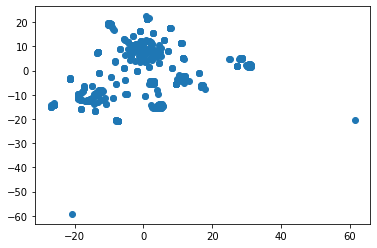

In [70]:
# create a scatter plot
plt.scatter(tdf["x"], tdf["y"])
plt.show

### There do seem to be a few potential clusters. Using k-Means will help to explore this potential clustering further.

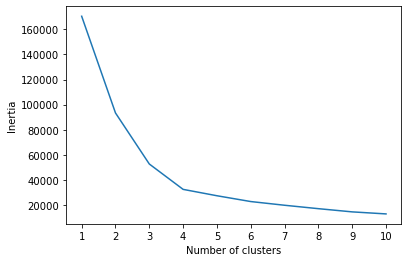

In [72]:
#create an empty list for inertia values
inertia = []

#create a list of values for k
k = [1,2,3,4,5,6,7,8,9,10]


# use a for loop to test each value in the list of potential k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tdf)
    inertia.append(km.inertia_)

# use the results of the above code to create a new dataframe which can then be used to plot an elbow curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

#plot the elbow curve

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Based on this elbow curve, one could make the case for both 3 and 4 as appropriate k values. For this project, 4 will do nicely.

In [73]:
# use a k value of 4 to cluster the data
kmeans = KMeans(n_clusters=4)
kmeans.fit(tdf)
y_kmeans = kmeans.predict(tdf)

<function matplotlib.pyplot.show(close=None, block=None)>

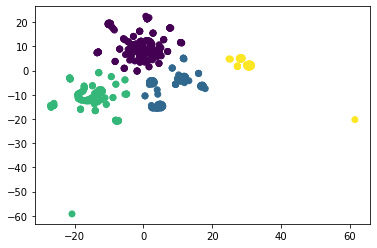

In [74]:
# create a new scatter plot that uses color to show the k-Means clusters
plt.scatter(tdf["x"], tdf["y"], c=y_kmeans)
plt.show

### Looking at the above plot, it seems that the cryptocurrencies can be clustered into 4 clusters using k-Means. However, these clusters do not provide meaningful insight into the desirability of investing in specific cryptocurrencies. Other steps or different methods of evaluatin